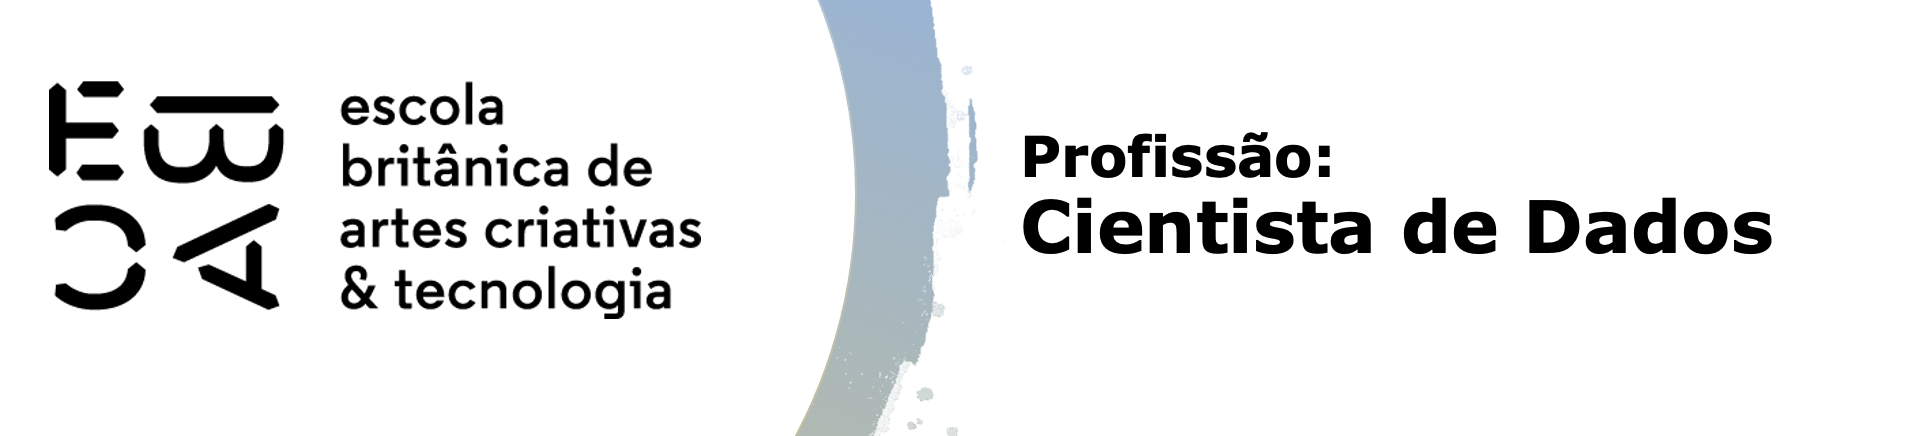

# Árvores II - Tarefa 3

### 1. Carregar as bases

Vamos utilizar nesta tarefa as bases de reconhecimento de atividade humana através do celular. Carregue novamente as bases salvas na tarefa I.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

In [88]:
X_test_all = pd.read_csv('input/X_test.csv', index_col=[0,1])
X_train_all = pd.read_csv('input/X_train.csv', index_col=[0,1])
y_train = pd.read_csv('input/y_train.txt', header=None, sep='+')
y_test = pd.read_csv('input/y_test.txt', header=None, sep='+')

### 2. Calcule os ```ccp_alphas```. 

Vamos seguir uma lógica bem em linha com o que já estamso acostumados, com as seguintes orientações:

- Utilizar treinamento e teste conforme já vieram definidos originalmente
- Por pragmatismo, utilizar ```min_samples_leaf=20```
- Utilize as mesmas "3 melhores variáveis" identificadas no exercício anterior.

In [89]:
%%time
clf = DecisionTreeClassifier(random_state=2309, min_samples_leaf=20)
clf.fit(X_train_all, y_train)

CPU times: total: 4.39 s
Wall time: 5.58 s


DecisionTreeClassifier(min_samples_leaf=20, random_state=2309)

##### Selecionando as 3 variáveis de maior importância com `ferature_importances_`:

In [90]:
importance = clf.feature_importances_
var = X_train_all.columns

df_importance = pd.DataFrame({'var': var,'importancia': importance})
df_importance.sort_values(by='importancia', ascending=False).head(3)

,var,importancia
52,tGravityAcc-min()-X,0.256956
389,"fBodyAccJerk-bandsEnergy()-1,16",0.215605
559,"angle(Y,gravityMean)",0.141442


In [91]:
best_var = df_importance.sort_values(by='importancia', ascending=False).iloc[0:3, 0].to_list()

Filtrando o DataFrame para possuir apenas as variáveis selecionadas:

In [92]:
X_train = X_train_all[best_var]
X_test = X_test_all[best_var]

Exibição do DataFrame:

In [93]:
X_test.sample(5)

,,tGravityAcc-min()-X,"fBodyAccJerk-bandsEnergy()-1,16","angle(Y,gravityMean)"
,subject,,,
310,4,0.955951,-0.999971,0.116166
2319,20,0.920449,-0.806820,0.305521
2439,20,0.937410,-0.999989,-0.086936
1499,12,0.949402,-0.751038,0.271683
661,9,0.986860,-0.999741,0.042804


In [94]:
X_train.sample(5)

,,tGravityAcc-min()-X,"fBodyAccJerk-bandsEnergy()-1,16","angle(Y,gravityMean)"
,subject,,,
2853,15,0.920239,-0.669488,0.311189
3588,17,0.877871,-0.730059,0.352272
2910,16,0.941880,-0.999917,0.168148
4750,23,0.985022,-0.999961,0.056731
810,5,0.976889,-0.654453,0.101312


##### Cálculo dos `ccp_alphas`:

In [95]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Verifica se há valores duplicados ou negativos:

In [96]:
ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])

### 3. *Grid Search*

Vou deixar especificações iniciais mínimas, que visam limitar o tempo de máquina, pois um procedimento desses pode demorar muito tempo dependendo da especificação. Mas conforme você for ficando confortável com o tempo consumido pelo procedimento, pode fazer um algoritmo mais exaustivo, por exemplo, avaliando mais valores de ```ccp_alpha```.

- Meça o tempo
- Utilize a base de treinamento
- Utilize um *cross validation* do tipo *k-fold*, especifique k=10
- Você pode ler 1 a cada ```k``` valores para uma melhor varredura utilizando, por exemplo, ```ccp_alpha[::10]```
- Não se esqueça de limitar o número de variáveis

In [97]:
grid_parametros = {'ccp_alpha':ccp_alphas}

In [98]:
%%time
grid = GridSearchCV(estimator = clf, param_grid=grid_parametros, cv=10, verbose=100)
grid.fit(X_train, y_train) 

Fitting 10 folds for each of 104 candidates, totalling 1040 fits
[CV 1/10; 1/104] START ccp_alpha=0.0............................................
[CV 1/10; 1/104] END .............ccp_alpha=0.0;, score=0.735 total time=   0.0s
[CV 2/10; 1/104] START ccp_alpha=0.0............................................
[CV 2/10; 1/104] END .............ccp_alpha=0.0;, score=0.740 total time=   0.0s
[CV 3/10; 1/104] START ccp_alpha=0.0............................................
[CV 3/10; 1/104] END .............ccp_alpha=0.0;, score=0.844 total time=   0.0s
[CV 4/10; 1/104] START ccp_alpha=0.0............................................
[CV 4/10; 1/104] END .............ccp_alpha=0.0;, score=0.733 total time=   0.0s
[CV 5/10; 1/104] START ccp_alpha=0.0............................................
[CV 5/10; 1/104] END .............ccp_alpha=0.0;, score=0.759 total time=   0.0s
[CV 6/10; 1/104] START ccp_alpha=0.0............................................
[CV 6/10; 1/104] END .............ccp_alpha=

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(min_samples_leaf=20,
                                              random_state=2309),
             param_grid={'ccp_alpha': array([0.00000000e+00, 6.43621258e-06, 6.59906426e-06, 6.65079323e-06,
       8.57020268e-06, 1.13900758e-05, 1.18345542e-05, 1.58251025e-05,
       1.65530622e-05, 2.30817423e-05, 2.84988860e-05, 2.94533941e-05,
       3.19901575e-05, 3.88621172e-05, 4.71527022e-05, 5.0...
       1.39447403e-03, 1.48587311e-03, 1.52178632e-03, 1.60234262e-03,
       1.60734613e-03, 1.96678382e-03, 2.11826404e-03, 2.12674961e-03,
       2.13251849e-03, 2.16385984e-03, 2.42923051e-03, 2.58529183e-03,
       3.23581373e-03, 3.76250065e-03, 4.80043229e-03, 5.47981355e-03,
       6.88407984e-03, 7.13824344e-03, 1.00771496e-02, 4.42597014e-02,
       6.33689986e-02, 1.09363718e-01, 1.67257720e-01, 1.86138242e-01])},
             verbose=100)

### 4. Avaliando a árvore

- Obtenha a árvore na melhor configuração treinada em toda a base de treino
- Calcule a acurácia dessa árvore na base de testes
- Visualize a matriz de confusão

In [99]:
resultados = pd.DataFrame(grid.cv_results_)
resultados.sample(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
30,0.023585,0.009423,0.006786,0.008033,0.000136,{'ccp_alpha': 0.00013596175662367038},0.735054,0.733696,0.843537,0.734694,0.759184,0.770068,0.804082,0.729252,0.848980,0.791837,0.775038,0.043120,68
29,0.026627,0.007843,0.002350,0.004824,0.000117,{'ccp_alpha': 0.00011725638812802499},0.735054,0.740489,0.843537,0.733333,0.759184,0.770068,0.804082,0.729252,0.848980,0.791837,0.775582,0.042645,36
24,0.027790,0.008737,0.002906,0.005032,0.000081,{'ccp_alpha': 8.070923704646556e-05},0.735054,0.740489,0.843537,0.733333,0.759184,0.770068,0.804082,0.729252,0.848980,0.791837,0.775582,0.042645,36
72,0.025098,0.009225,0.008143,0.008446,0.000931,{'ccp_alpha': 0.000931108829963361},0.760870,0.726902,0.851701,0.778231,0.746939,0.768707,0.816327,0.717007,0.836735,0.791837,0.779525,0.042655,28
17,0.023857,0.009487,0.004364,0.007508,0.000059,{'ccp_alpha': 5.8719770042441315e-05},0.735054,0.740489,0.843537,0.733333,0.759184,0.770068,0.804082,0.729252,0.848980,0.791837,0.775582,0.042645,36


In [100]:
melhor_ccp = resultados.iloc[grid.best_index_,4]

clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=melhor_ccp).fit(X_train, y_train)

In [101]:
print(f'Acurácia: {clf.score(X_test,y_test)*100:.2f}%')

Acurácia: 68.99%


### 5. Melhorando a árvore

A melhor forma de se melhorar um algoritmo é colocando nele novas variáveis que agreguem valor. Podemos usar a força-bruta e ir colocando variáveis aleatoriamente - ou colocar todas e deixar rodando por um bom tempo - ou utilizar uma lógica eficiente e fazer uma seleção de variáveis.

- Observe que há classes mais fáceis e mais difíceis de se identificar
- Crie uma variável binária para uma das classes de maior erro
- Fala uma árvore de classificação bem simples para esta variável:
    - utilize ```mean_samples_leaf=20```
    - utilize ```max_depth=4```
    - coloque todas as variáveis
- Observe a importância das variáveis, e selecione as 3 com maior importância
- Rode novamente o algoritmo acima com as 3 novas variáveis e avalie a acurácia

Acurácia: 68.99%


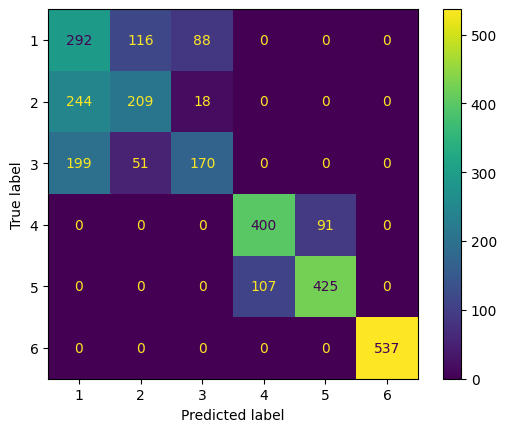

In [102]:
print(f'Acurácia: {clf.score(X_test,y_test)*100:.2f}%')
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test);

De acordo com a Matriz de Confusão, a classe com maior dificuldade de previsão é a com valor igual a 1.

In [103]:
y_pred = clf.predict(X_test)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.40      0.59      0.47       496
           2       0.56      0.44      0.49       471
           3       0.62      0.40      0.49       420
           4       0.79      0.81      0.80       491
           5       0.82      0.80      0.81       532
           6       1.00      1.00      1.00       537

    accuracy                           0.69      2947
   macro avg       0.70      0.68      0.68      2947
weighted avg       0.71      0.69      0.69      2947



Observando o relatório de classificação, podemos ver que a classe igual a 1 apresenta os menores valores para `precision` e `f1-score`. Portanto, esta será a classe utilizada para criação de uma variável binária.

##### Criando a variável binária e adicionando ao DataFrame com todas as variáveis:

In [65]:
X_test_error = X_test_all.copy()
X_train_error = X_train_all.copy()
X_test_error['error_class'] = (y_test[0] == 1).astype(int).to_list()
X_train_error['error_class'] = (y_train[0] == 1).astype(int).to_list()

##### Criação da árvore de decisão com a variável nova:

In [66]:
clf = DecisionTreeClassifier(random_state=2309, min_samples_leaf=20, max_depth=4)
clf.fit(X_train_error, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=20, random_state=2309)

##### Seleção das variáveis de maior importância:

Cria um DataFrame com o nome da variável e o valor da sua importância.

In [67]:
importances = clf.feature_importances_
var = X_train_error.columns

df_importances = pd.DataFrame({'var': var, 'importancia': importances})
df_importances.sort_values(by='importancia', ascending=False).head(3)

,var,importancia
52,tGravityAcc-min()-X,0.261584
271,fBodyAcc-mad()-X,0.235051
562,error_class,0.220461


Seleciona as 3 variáveis com maior valor de importância.

In [68]:
best_vars = df_importances.sort_values(by='importancia', ascending=False).iloc[0:3, 0].to_list()

Cria um novo DataFrame apenas com as 3 melhores variáveis.

In [69]:
X_train_new = X_train_error[best_vars]
X_test_new = X_test_error[best_vars]

##### Cálculo dos `ccp_alhpas`:

Calcula os valores de `ccp_alphas` e verifica se há valores duplicados ou negativos.

In [72]:
path = clf.cost_complexity_pruning_path(X_train_new, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])

##### GridSeach:

Utilizando o GridSeach para encontrar o melhor valor de `ccp_alpha`.

In [73]:
grid_parametros = {'ccp_alpha':ccp_alphas}
grid = GridSearchCV(estimator = clf, param_grid=grid_parametros, cv=10, verbose=100)
grid.fit(X_train, y_train) 

Fitting 10 folds for each of 8 candidates, totalling 80 fits
[CV 1/10; 1/8] START ccp_alpha=0.0..............................................
[CV 1/10; 1/8] END ...............ccp_alpha=0.0;, score=0.796 total time=   0.0s
[CV 2/10; 1/8] START ccp_alpha=0.0..............................................
[CV 2/10; 1/8] END ...............ccp_alpha=0.0;, score=0.810 total time=   0.0s
[CV 3/10; 1/8] START ccp_alpha=0.0..............................................
[CV 3/10; 1/8] END ...............ccp_alpha=0.0;, score=0.873 total time=   0.0s
[CV 4/10; 1/8] START ccp_alpha=0.0..............................................
[CV 4/10; 1/8] END ...............ccp_alpha=0.0;, score=0.766 total time=   0.0s
[CV 5/10; 1/8] START ccp_alpha=0.0..............................................
[CV 5/10; 1/8] END ...............ccp_alpha=0.0;, score=0.830 total time=   0.0s
[CV 6/10; 1/8] START ccp_alpha=0.0..............................................
[CV 6/10; 1/8] END ...............ccp_alpha=0.0;

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(max_depth=4, min_samples_leaf=20,
                                              random_state=2309),
             param_grid={'ccp_alpha': array([0.        , 0.001898  , 0.00219678, 0.02246683, 0.06303639,
       0.15687567, 0.16725772, 0.18613824])},
             verbose=100)

Visualização dos resultados encontrados.

In [74]:
resultados = pd.DataFrame(grid.cv_results_)
resultados.sample(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
2,0.019653,0.006200,0.002144,0.003501,0.002197,{'ccp_alpha': 0.002196779295309037},0.796196,0.809783,0.873469,0.765986,0.829932,0.790476,0.838095,0.779592,0.865306,0.722449,0.807128,0.043921,2
1,0.017081,0.006813,0.002305,0.001995,0.001898,{'ccp_alpha': 0.0018979986464792535},0.796196,0.809783,0.873469,0.765986,0.829932,0.790476,0.838095,0.779592,0.865306,0.722449,0.807128,0.043921,2
3,0.016907,0.005775,0.002524,0.005888,0.022467,{'ccp_alpha': 0.02246683368460259},0.813859,0.809783,0.873469,0.785034,0.813605,0.823129,0.831293,0.779592,0.865306,0.722449,0.811752,0.041138,1
7,0.020966,0.007639,0.005682,0.006718,0.186138,{'ccp_alpha': 0.1861382417305819},0.191576,0.191576,0.191837,0.191837,0.191837,0.191837,0.191837,0.376871,0.376871,0.376871,0.247295,0.084827,8
6,0.018056,0.002718,0.001932,0.004866,0.167258,{'ccp_alpha': 0.1672577195777995},0.543478,0.546196,0.379592,0.545578,0.544218,0.544218,0.544218,0.376871,0.376871,0.376871,0.477811,0.081868,7


Com o melhor valor de `ccp_alpha` encontrado pelo GridSearch, basta selecionar o mesmo e treinar uma nova árvore adicionando o parametro.

##### Criação de uma nova árvore com o valor encontrado:

In [75]:
melhor_ccp = resultados.iloc[grid.best_index_,4]

clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=melhor_ccp).fit(X_train_new, y_train)

Calcula a acurácia e exibe a Matriz de Confusão para a nova árvore treinada.

Acurácia: 78.45%


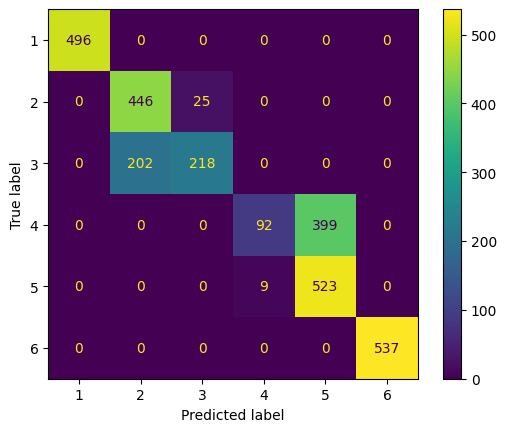

In [78]:
print(f'Acurácia: {clf.score(X_test_new,y_test)*100:.2f}%')
ConfusionMatrixDisplay.from_estimator(clf, X_test_new, y_test);

Utilizando a variável binária criada a partir de uma classe de maior erro da variável alvo, o modelo conseguiu uma acurácia 10% maior que a alcançada anteriormente. 

Sendo a acurácia inicial de 68% e a final, após feito o procedimento acima citado, de 78%.